In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
from CENSAr.urban_scenarios import corrientes_stquo_2020

## 1. Escenario de crecimiento

In [4]:
# raster data analysis outputs
path00 = '../../CENSAr/data/ManchaUrbana_Corrientes_1999.geojson'
path10 = '../../CENSAr/data/ManchaUrbana_Corrientes_2010.geojson'
path20 = '../../CENSAr/data/ManchaUrbana_Corrientes_2022.geojson'

In [5]:
# se carga el escenario de crecimiento urbano proyectado a 2020
urban_growth = corrientes_stquo_2020(path00, path10, path20, control_flow={'allocation_method':'avoid_relocations'})

[20:27:12] INFO     loading                                                                      ]8;id=393662;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=456869;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#112\112]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/tipo_vivienda_radios_                   
                    corrientes_2001.csv`                                                                           

           INFO     loading                                                                      ]8;id=622057;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=29302;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#112\112]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/tipo_vivienda_radios_                   
                    corrientes_2010.csv`                                                                           

[False]


[20:27:13] INFO     loadding                                                                     ]8;id=20010;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=28506;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#160\160]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/corrientes_tracts_pai                   
                    ring_0110.csv`                                                                                 

           INFO     Applying named aggregation `tipo vivienda particular`                                ]8;id=662713;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=592326;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           WARNING  Extra columns found for mapping situacion de calle: {'persona viviendo en la        ]8;id=916695;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=336836;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    calle'}. Extra columns will be ignored.                                                        

           INFO     Applying named aggregation `tipo vivienda particular`                                ]8;id=54200;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=417969;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           WARNING  Extra columns found for mapping formal: {'casa a', 'pieza en hotel o pension',      ]8;id=931286;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=853421;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    'casa b'}. Extra columns will be ignored.                                                      

           WARNING  Extra columns found for mapping situacion de calle: {'persona viviendo en la        ]8;id=583977;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=569587;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    calle'}. Extra columns will be ignored.                                                        

In [6]:
tipo_vivienda_agg_2001, tipo_vivienda_agg_2010, tipo_vivienda_agg_2020 = urban_growth[2001], urban_growth[2010], urban_growth[2020]
footpr_corrientes_00, footpr_corrientes_10, footpr_corrientes_20 =  urban_growth['footpr01'], urban_growth['footpr10'], urban_growth['footpr20']

# 2. Clusters según tipos de vivienda

In [7]:
tipo_vivienda_agg_2020.rename(columns={'total_viviendas':'total'}, inplace=True)

In [8]:
tipo_vivienda_agg_2010.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
tipo_vivienda_agg_2020.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 2.1. Grillas hexagonales - Viviendas totales

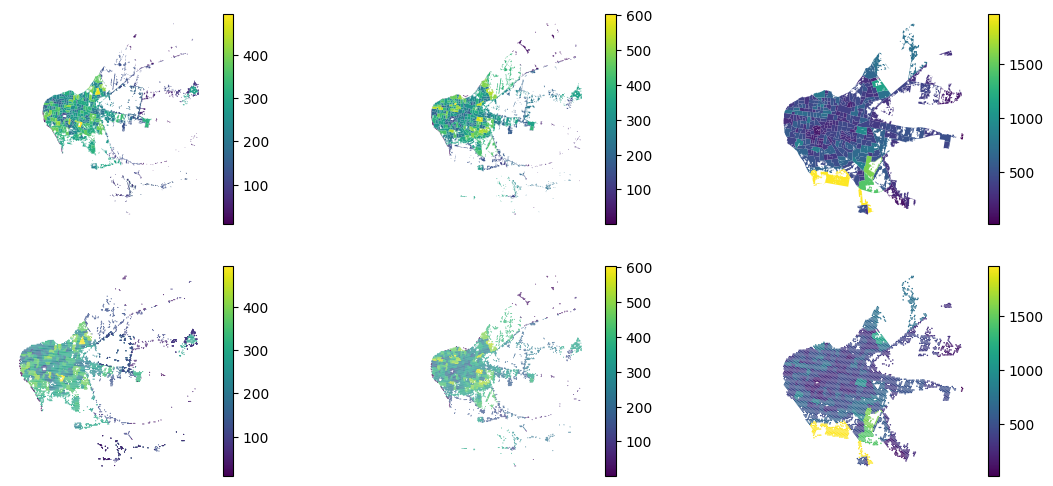

In [10]:
from CENSAr.clustering.geo_utils import geopandas_to_h3

fig, subplots = plt.subplots(2, 3, figsize=(14, 6))

tipo_vivienda_2001_h3 = geopandas_to_h3(tipo_vivienda_agg_2001, resolution=10)
tipo_vivienda_2010_h3 = geopandas_to_h3(tipo_vivienda_agg_2010, resolution=10)
tipo_vivienda_2020_h3 = geopandas_to_h3(tipo_vivienda_agg_2020.to_crs(tipo_vivienda_agg_2010.crs), resolution=10)

for ax, gdf in zip(subplots[0], [tipo_vivienda_agg_2001, tipo_vivienda_agg_2010, tipo_vivienda_agg_2020]):
    gdf.plot(column="total", legend=True, ax=ax)
    ax.set_axis_off();
for ax, gdf in zip(
    subplots[1], [tipo_vivienda_2001_h3, tipo_vivienda_2010_h3, tipo_vivienda_2020_h3]
):
    gdf.plot(column="total", legend=True, ax=ax)
    ax.set_axis_off();

## 2.2. Correlacion espacial por tipos de vivienda (LISAs)

In [11]:
from CENSAr.clustering.moran import lisa
from CENSAr.plots import plot_local_autocorrelation

## 2001

In [12]:
import pandas as pd

P_VALUE = 0.05

indicadores = ["formal", "informal", "situacion de calle"]
lisas_2001 = lisa(tipo_vivienda_agg_2001, indicadores)
lisas_2001 = dict(zip(indicadores, lisas_2001))

full = pd.DataFrame(
    {
        "formal": lisas_2001["formal"].Is,
        "informal": lisas_2001["informal"].Is,
        "situacion de calle": lisas_2001["situacion de calle"].Is,
    }
)
mean = (full > P_VALUE).mean(axis=0)
mean

('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 316, ' is an island (no neighbors)')


formal                0.495268
informal              0.634069
situacion de calle    0.006309
dtype: float64

In [13]:
global_formal, global_informal, global_calle =  lisa(tipo_vivienda_agg_2001, indicadores, local=False)
[print(f"Autocorrelación espacial global:{round(i,2)}") for i in (global_formal.I, global_informal.I, global_calle.I)];

('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 316, ' is an island (no neighbors)')
Autocorrelación espacial global:0.29
Autocorrelación espacial global:0.23
Autocorrelación espacial global:-0.04


('WARNING: ', 694, ' is an island (no neighbors)')
('WARNING: ', 2510, ' is an island (no neighbors)')
('WARNING: ', 2615, ' is an island (no neighbors)')
('WARNING: ', 2624, ' is an island (no neighbors)')
('WARNING: ', 2634, ' is an island (no neighbors)')
('WARNING: ', 2642, ' is an island (no neighbors)')
('WARNING: ', 2646, ' is an island (no neighbors)')
('WARNING: ', 2647, ' is an island (no neighbors)')
('WARNING: ', 2669, ' is an island (no neighbors)')
('WARNING: ', 2679, ' is an island (no neighbors)')
('WARNING: ', 2699, ' is an island (no neighbors)')
('WARNING: ', 2729, ' is an island (no neighbors)')
('WARNING: ', 2753, ' is an island (no neighbors)')
('WARNING: ', 2757, ' is an island (no neighbors)')
('WARNING: ', 2758, ' is an island (no neighbors)')
('WARNING: ', 2765, ' is an island (no neighbors)')
('WARNING: ', 2777, ' is an island (no neighbors)')
('WARNING: ', 2792, ' is an island (no neighbors)')
('WARNING: ', 2796, ' is an island (no neighbors)')
('WARNING: ',

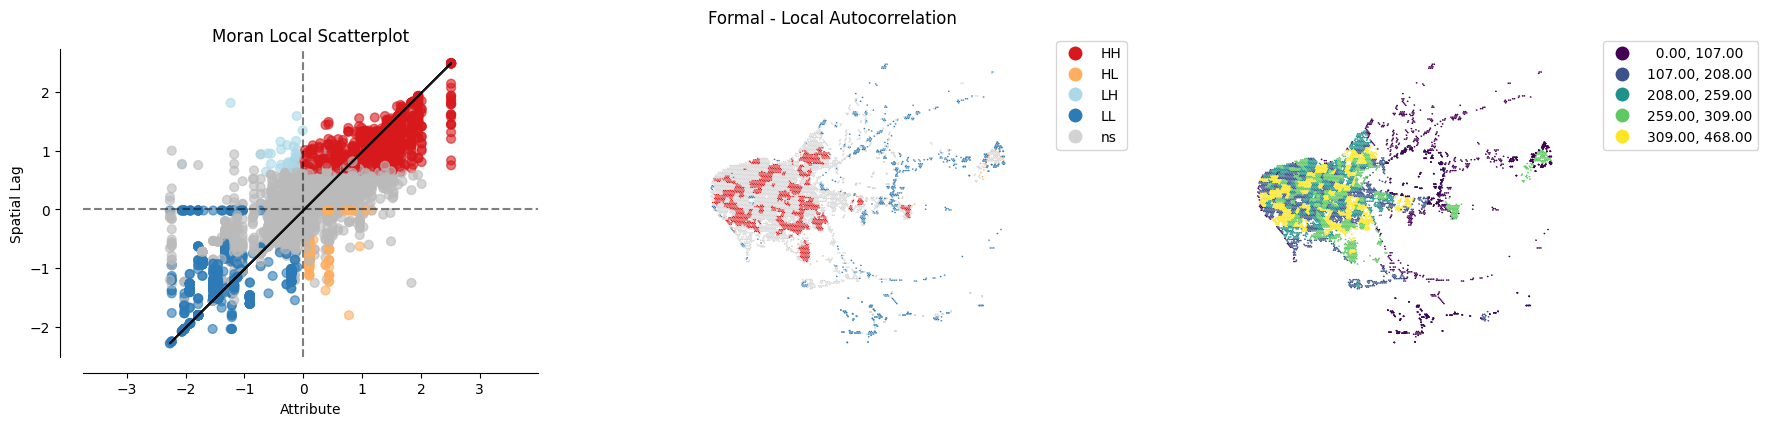

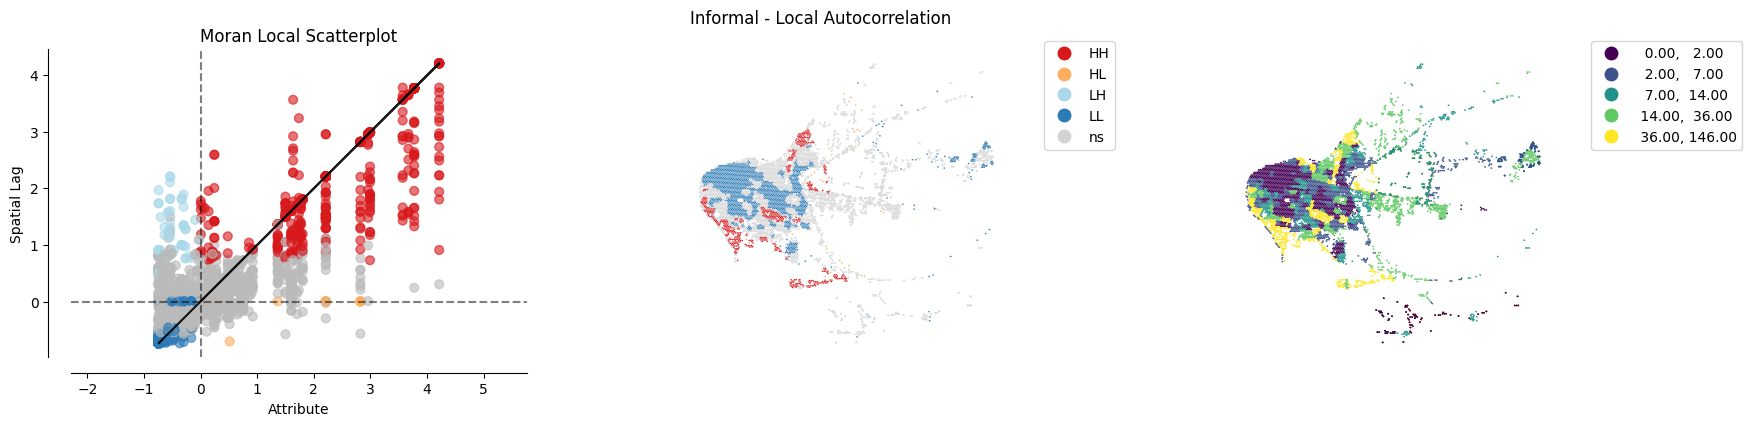

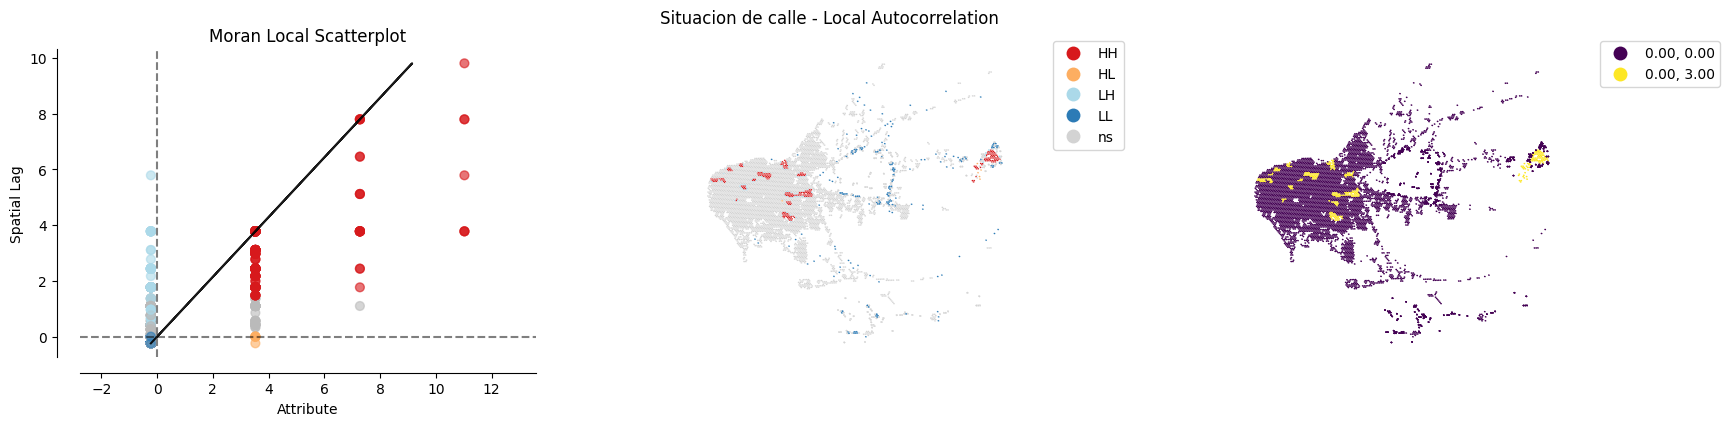

In [14]:
plot_local_autocorrelation(
    tipo_vivienda_2001_h3, ["formal", "informal", "situacion de calle"], figsize=(20, 4)
)

## 2010 

In [15]:
P_VALUE = 0.05

indicadores = ["formal", "informal", "situacion de calle"]
lisas_2010 = lisa(tipo_vivienda_agg_2010, indicadores)
lisas_2010 = dict(zip(indicadores, lisas_2010))

full = pd.DataFrame(
    {
        "formal": lisas_2010["formal"].Is,
        "informal": lisas_2010["informal"].Is,
        "situacion de calle": lisas_2010["situacion de calle"].Is,
    }
)
mean = (full > P_VALUE).mean(axis=0)
mean

('WARNING: ', 62, ' is an island (no neighbors)')


formal                0.532934
informal              0.619760
situacion de calle    0.011976
dtype: float64

In [16]:
global_formal, global_informal, global_calle =  lisa(tipo_vivienda_agg_2010, indicadores, local=False)
[print(f"Autocorrelación espacial global:{round(i,2)}") for i in (global_formal.I, global_informal.I, global_calle.I)];

('WARNING: ', 62, ' is an island (no neighbors)')
Autocorrelación espacial global:0.31
Autocorrelación espacial global:0.22
Autocorrelación espacial global:-0.01


('WARNING: ', 713, ' is an island (no neighbors)')
('WARNING: ', 2203, ' is an island (no neighbors)')
('WARNING: ', 2214, ' is an island (no neighbors)')
('WARNING: ', 2228, ' is an island (no neighbors)')
('WARNING: ', 2248, ' is an island (no neighbors)')
('WARNING: ', 2252, ' is an island (no neighbors)')
('WARNING: ', 2257, ' is an island (no neighbors)')
('WARNING: ', 2258, ' is an island (no neighbors)')
('WARNING: ', 2288, ' is an island (no neighbors)')
('WARNING: ', 2290, ' is an island (no neighbors)')
('WARNING: ', 2329, ' is an island (no neighbors)')
('WARNING: ', 2335, ' is an island (no neighbors)')
('WARNING: ', 2344, ' is an island (no neighbors)')
('WARNING: ', 2417, ' is an island (no neighbors)')
('WARNING: ', 2420, ' is an island (no neighbors)')
('WARNING: ', 2451, ' is an island (no neighbors)')
('WARNING: ', 2464, ' is an island (no neighbors)')
('WARNING: ', 2480, ' is an island (no neighbors)')
('WARNING: ', 2484, ' is an island (no neighbors)')
('WARNING: ',

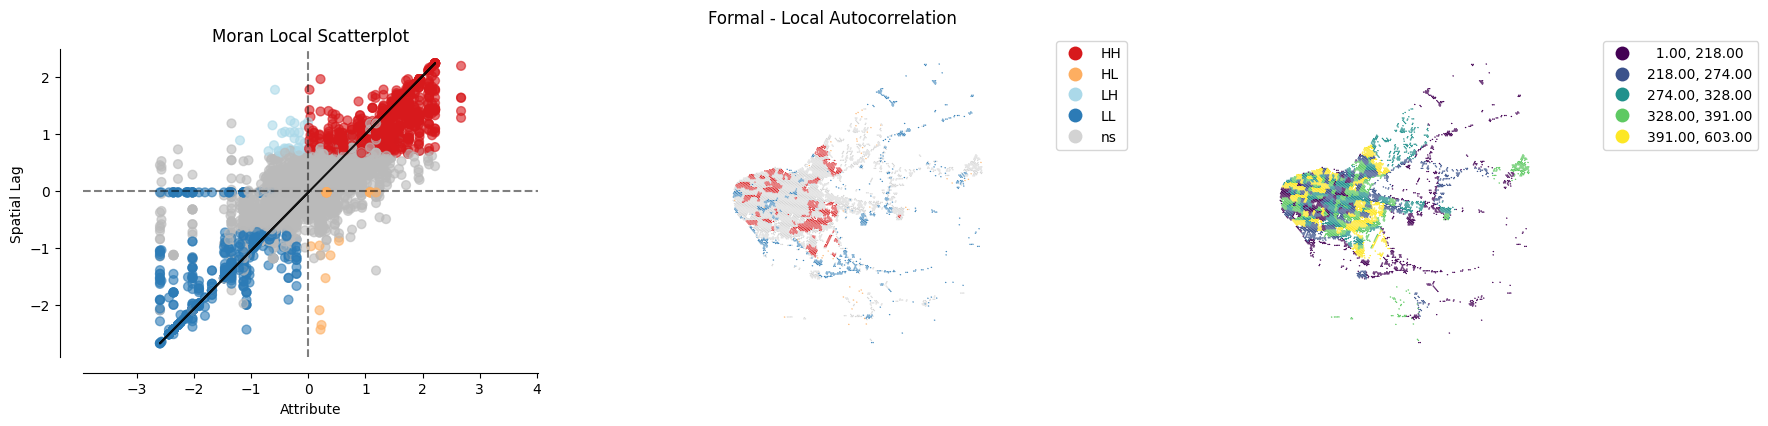

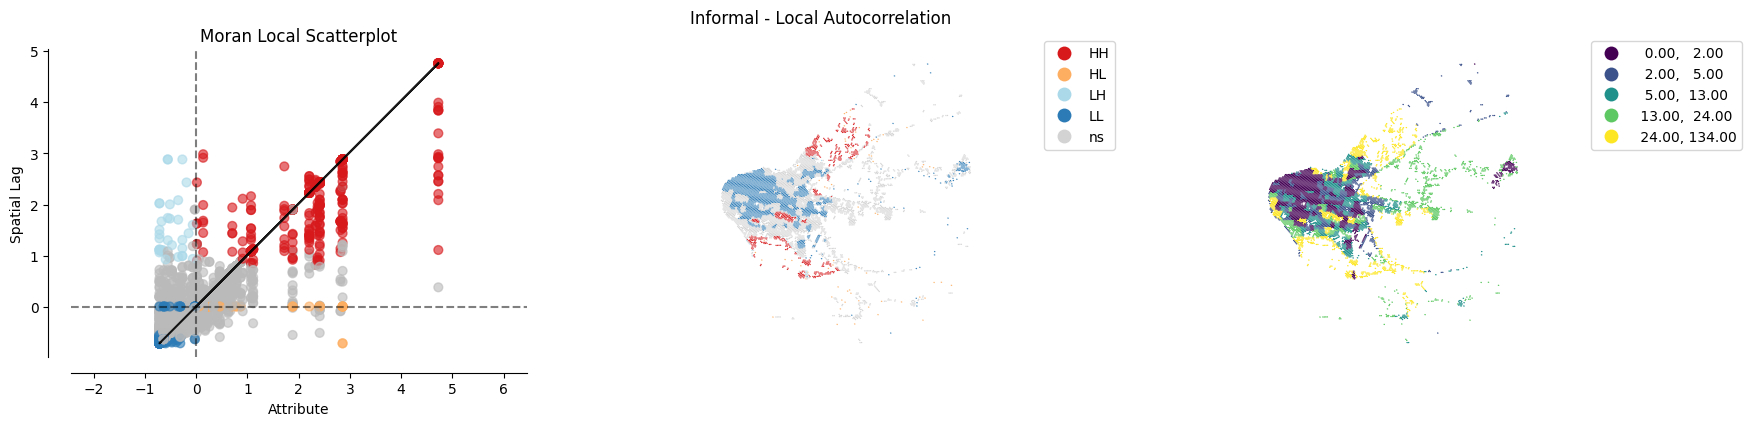

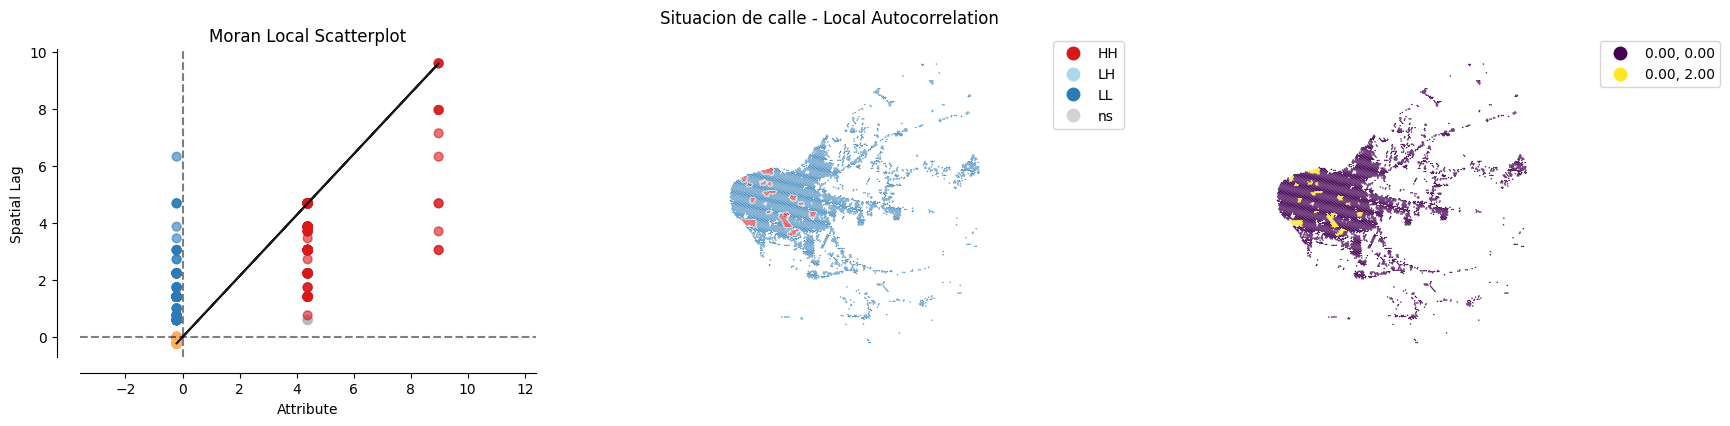

In [17]:
plot_local_autocorrelation(
    tipo_vivienda_2010_h3, ["formal", "informal", "situacion de calle"], figsize=(20, 4)
)

## 2020

In [18]:
P_VALUE = 0.05

indicadores = ["formal", "informal"]
lisas_2020 = lisa(tipo_vivienda_agg_2020, indicadores)
lisas_2020 = dict(zip(indicadores, lisas_2020))

full = pd.DataFrame(
    {
        "formal": lisas_2020["formal"].Is,
        "informal": lisas_2020["informal"].Is,
    }
)
mean = (full > P_VALUE).mean(axis=0)
mean

formal      0.520767
informal    0.670927
dtype: float64

In [19]:
global_formal, global_informal =  lisa(tipo_vivienda_agg_2020, indicadores, local=False)
[print(f"Autocorrelación espacial global:{round(i,2)}") for i in (global_formal.I, global_informal.I)];

Autocorrelación espacial global:0.2
Autocorrelación espacial global:0.29


('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 313, ' is an island (no neighbors)')
('WARNING: ', 776, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 3064, ' is an island (no neighbors)')
('WARNING: ', 3086, ' is an island (no neighbors)')
('WARNING: ', 3088, ' is an island (no neighbors)')
('WARNING: ', 3155, ' is an island (no neighbors)')
('WARNING: ', 3193, ' is an island (no neighbors)')
('WARNING: ', 3227, ' is an island (no neighbors)')
('WARNING: ', 3241, ' is an island (no neighbors)')
('WARNING: ', 3265, ' is an island (no neighbors)')
('WARNING: ', 3286, ' is an island (no neighbors)')
('WARNING: ', 3316, ' is an island (no neighbors)')
('WARNING: ', 3317, ' is an island (no neighbors)')
('WARNING: ', 3326, ' is an island (no neighbors)')
('WARNING: ', 3361, ' is an island (no neighbors)')
('WARNING: ', 3371, ' is an island (no neighbors)')
('WARNING: ', 3617, ' is an island (no neighbors)')
('WARNING: ', 3

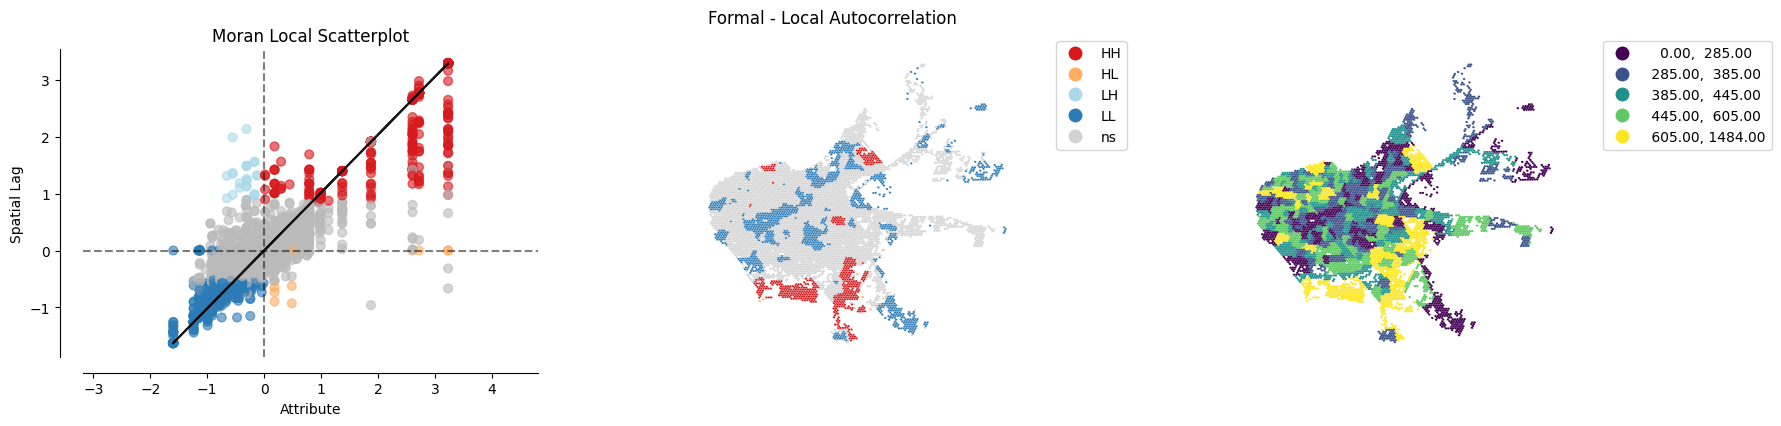

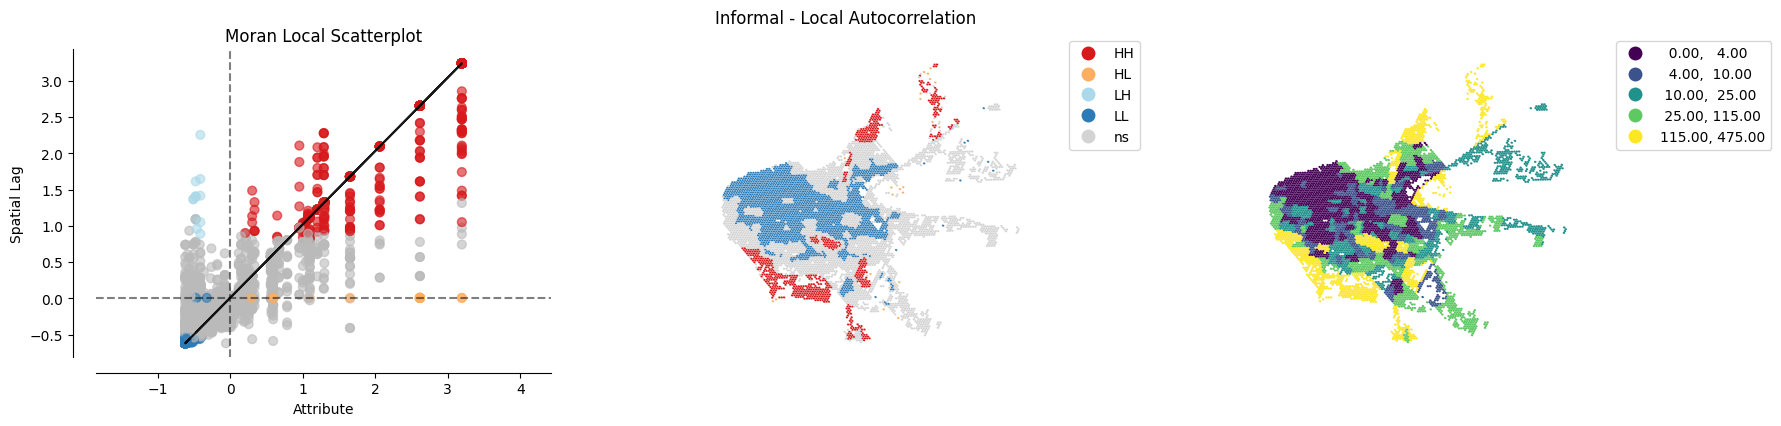

In [20]:
plot_local_autocorrelation(
    tipo_vivienda_2020_h3, ["formal", "informal"], figsize=(20, 4)
)

## 2.3. Evolución del patrón espacial de informalidad urbana

('WARNING: ', 694, ' is an island (no neighbors)')
('WARNING: ', 2510, ' is an island (no neighbors)')
('WARNING: ', 2615, ' is an island (no neighbors)')
('WARNING: ', 2624, ' is an island (no neighbors)')
('WARNING: ', 2634, ' is an island (no neighbors)')
('WARNING: ', 2642, ' is an island (no neighbors)')
('WARNING: ', 2646, ' is an island (no neighbors)')
('WARNING: ', 2647, ' is an island (no neighbors)')
('WARNING: ', 2669, ' is an island (no neighbors)')
('WARNING: ', 2679, ' is an island (no neighbors)')
('WARNING: ', 2699, ' is an island (no neighbors)')
('WARNING: ', 2729, ' is an island (no neighbors)')
('WARNING: ', 2753, ' is an island (no neighbors)')
('WARNING: ', 2757, ' is an island (no neighbors)')
('WARNING: ', 2758, ' is an island (no neighbors)')
('WARNING: ', 2765, ' is an island (no neighbors)')
('WARNING: ', 2777, ' is an island (no neighbors)')
('WARNING: ', 2792, ' is an island (no neighbors)')
('WARNING: ', 2796, ' is an island (no neighbors)')
('WARNING: ',

Text(0.5, 0.98, '2020 - Informal')

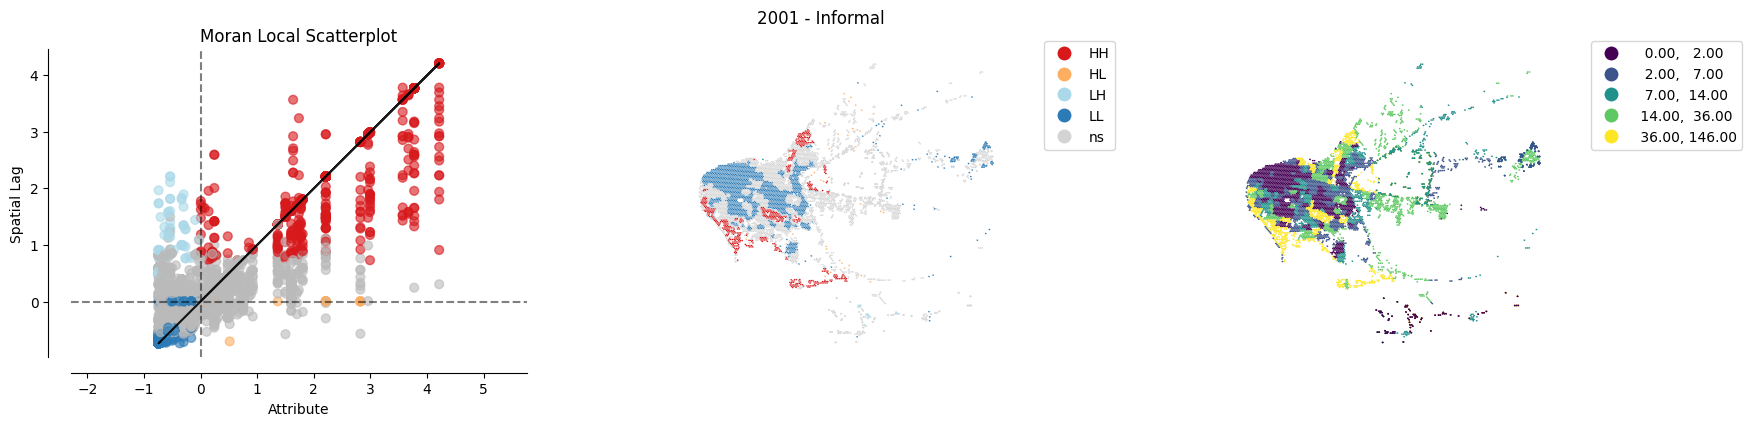

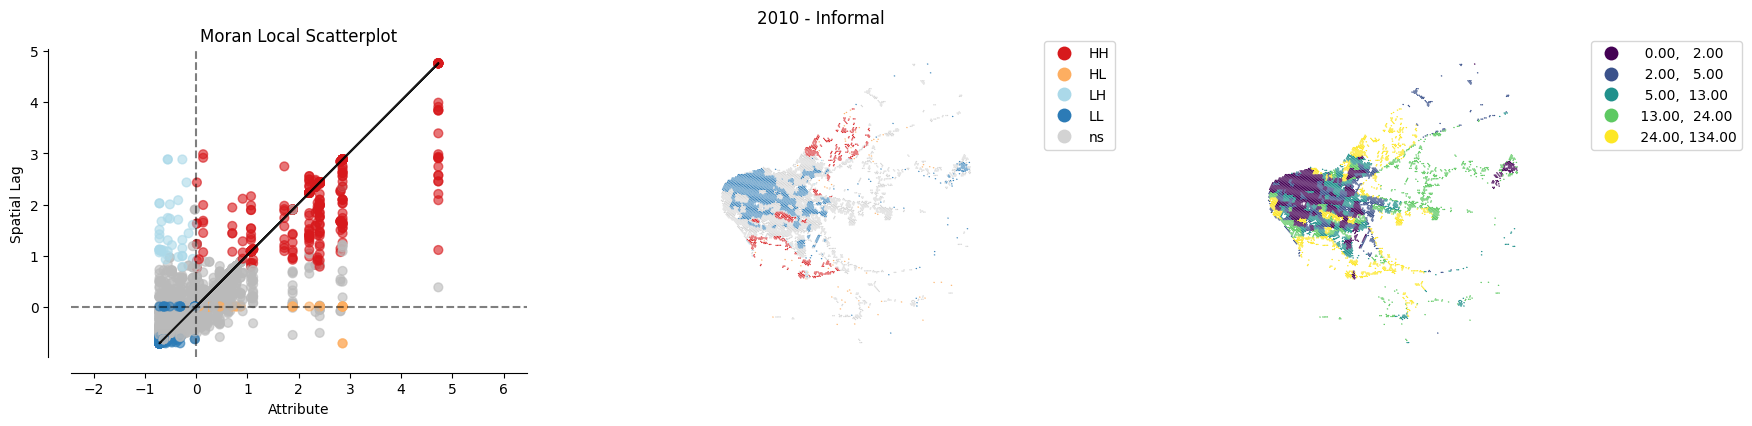

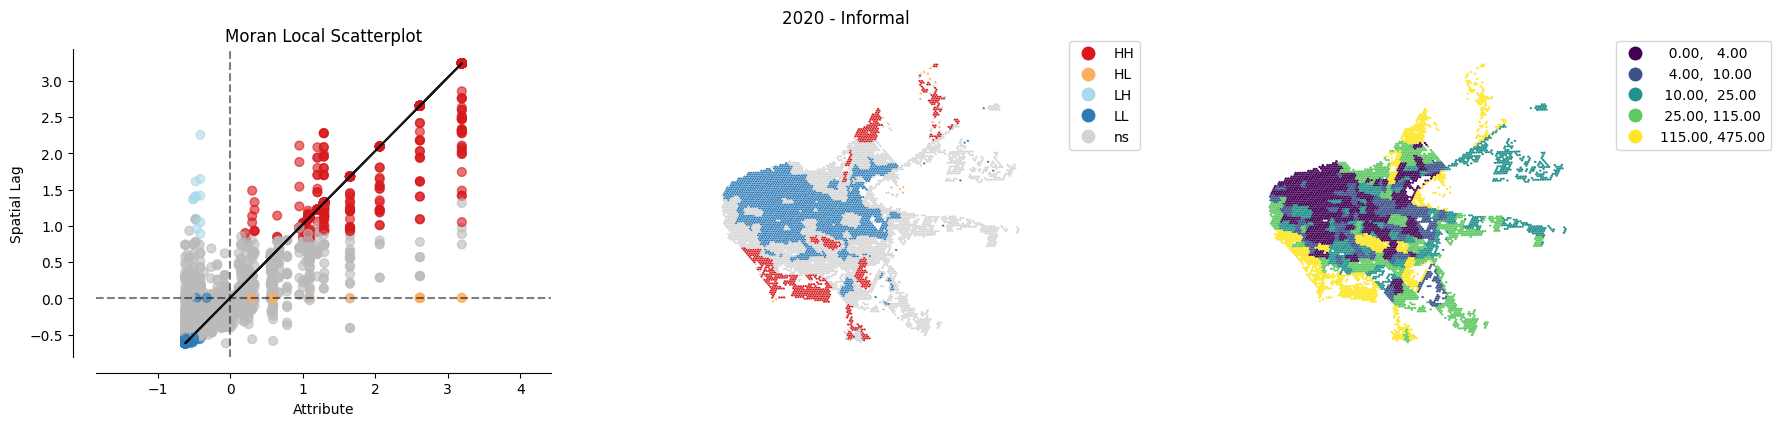

In [21]:
import matplotlib.pyplot as plt

indicador = "informal"
plot_local_autocorrelation(tipo_vivienda_2001_h3, [indicador], figsize=(20, 4))
plt.suptitle(f"2001 - {indicador.capitalize()}")
plot_local_autocorrelation(tipo_vivienda_2010_h3, [indicador], figsize=(20, 4))
plt.suptitle(f"2010 - {indicador.capitalize()}")
plot_local_autocorrelation(tipo_vivienda_2020_h3, [indicador], figsize=(20, 4))
plt.suptitle(f"2020 - {indicador.capitalize()}")

## 2.3. Análisis bivariado

In [22]:
from CENSAr.plots import plot_local_autocorrelation_bv

## 2001

('WARNING: ', 694, ' is an island (no neighbors)')
('WARNING: ', 2510, ' is an island (no neighbors)')
('WARNING: ', 2615, ' is an island (no neighbors)')
('WARNING: ', 2624, ' is an island (no neighbors)')
('WARNING: ', 2634, ' is an island (no neighbors)')
('WARNING: ', 2642, ' is an island (no neighbors)')
('WARNING: ', 2646, ' is an island (no neighbors)')
('WARNING: ', 2647, ' is an island (no neighbors)')
('WARNING: ', 2669, ' is an island (no neighbors)')
('WARNING: ', 2679, ' is an island (no neighbors)')
('WARNING: ', 2699, ' is an island (no neighbors)')
('WARNING: ', 2729, ' is an island (no neighbors)')
('WARNING: ', 2753, ' is an island (no neighbors)')
('WARNING: ', 2757, ' is an island (no neighbors)')
('WARNING: ', 2758, ' is an island (no neighbors)')
('WARNING: ', 2765, ' is an island (no neighbors)')
('WARNING: ', 2777, ' is an island (no neighbors)')
('WARNING: ', 2792, ' is an island (no neighbors)')
('WARNING: ', 2796, ' is an island (no neighbors)')
('WARNING: ',

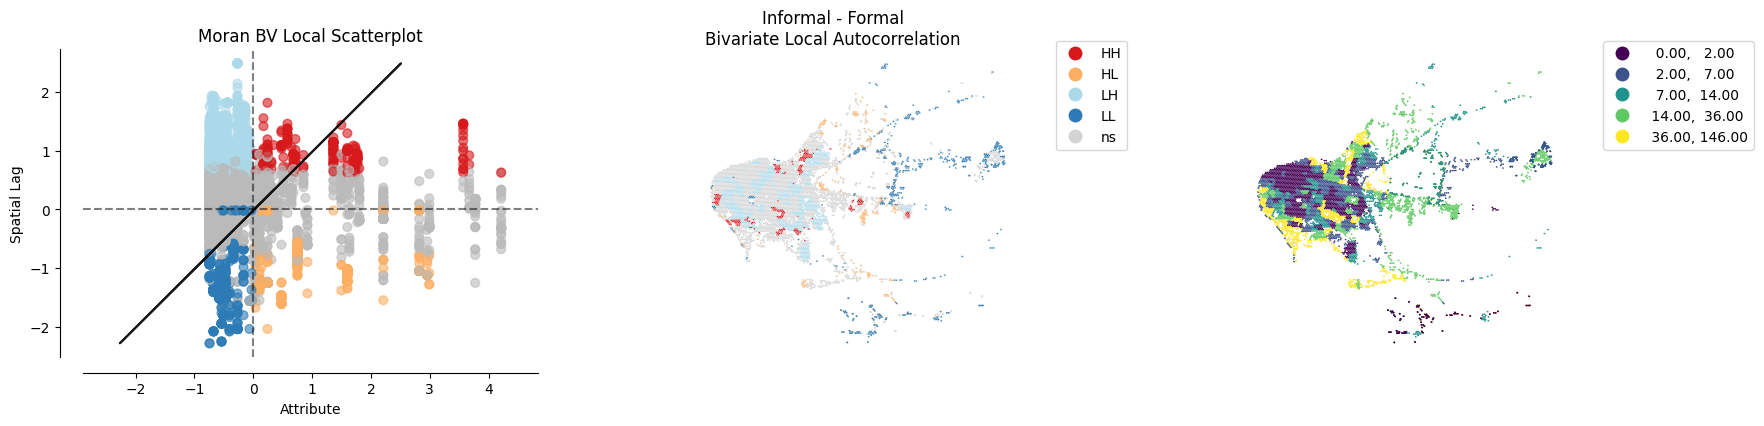

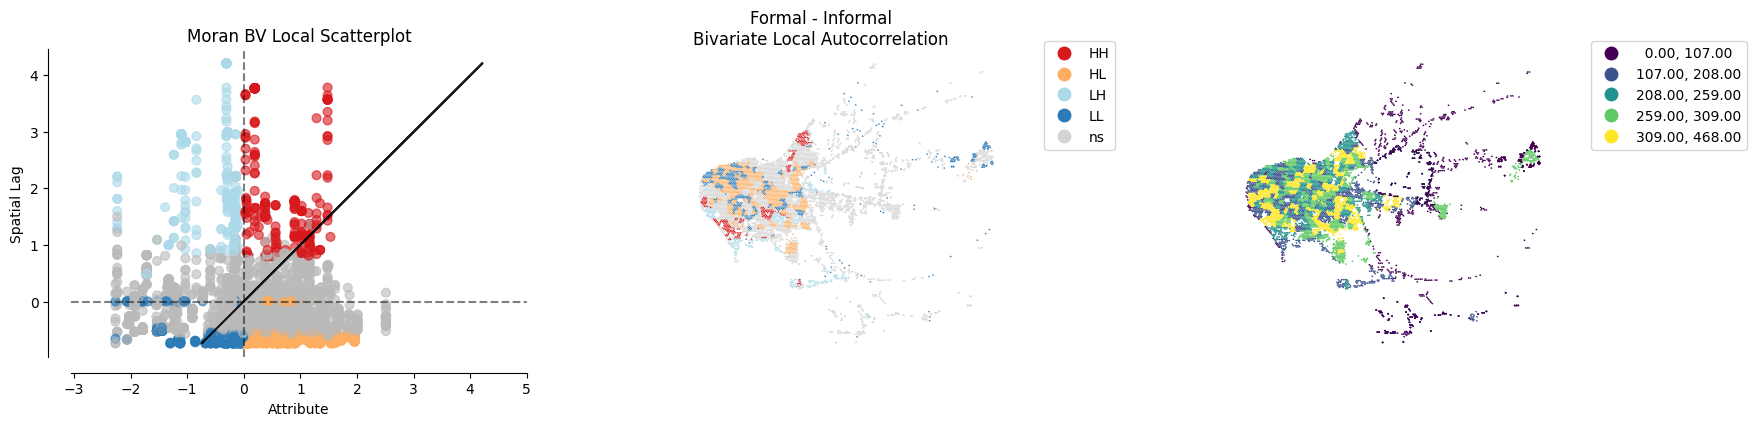

In [23]:
plot_local_autocorrelation_bv(
    tipo_vivienda_2001_h3, "informal", "formal", figsize=(20, 4)
)
plot_local_autocorrelation_bv(
    tipo_vivienda_2001_h3, "formal", "informal", figsize=(20, 4)
)

## 2010

('WARNING: ', 713, ' is an island (no neighbors)')
('WARNING: ', 2203, ' is an island (no neighbors)')
('WARNING: ', 2214, ' is an island (no neighbors)')
('WARNING: ', 2228, ' is an island (no neighbors)')
('WARNING: ', 2248, ' is an island (no neighbors)')
('WARNING: ', 2252, ' is an island (no neighbors)')
('WARNING: ', 2257, ' is an island (no neighbors)')
('WARNING: ', 2258, ' is an island (no neighbors)')
('WARNING: ', 2288, ' is an island (no neighbors)')
('WARNING: ', 2290, ' is an island (no neighbors)')
('WARNING: ', 2329, ' is an island (no neighbors)')
('WARNING: ', 2335, ' is an island (no neighbors)')
('WARNING: ', 2344, ' is an island (no neighbors)')
('WARNING: ', 2417, ' is an island (no neighbors)')
('WARNING: ', 2420, ' is an island (no neighbors)')
('WARNING: ', 2451, ' is an island (no neighbors)')
('WARNING: ', 2464, ' is an island (no neighbors)')
('WARNING: ', 2480, ' is an island (no neighbors)')
('WARNING: ', 2484, ' is an island (no neighbors)')
('WARNING: ',

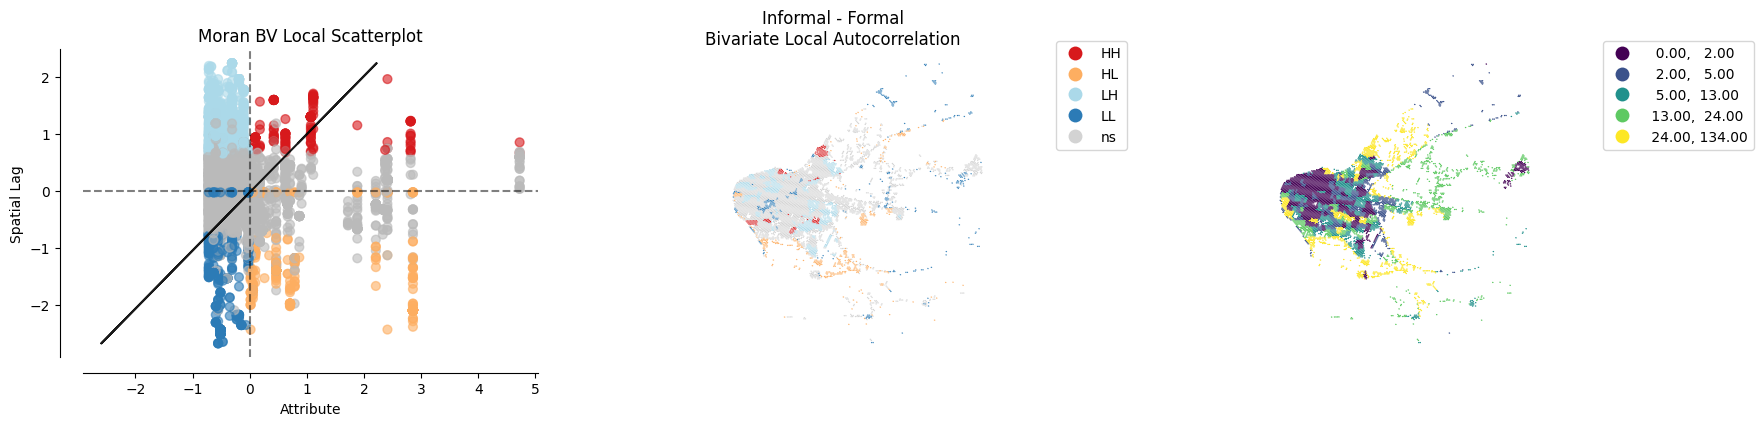

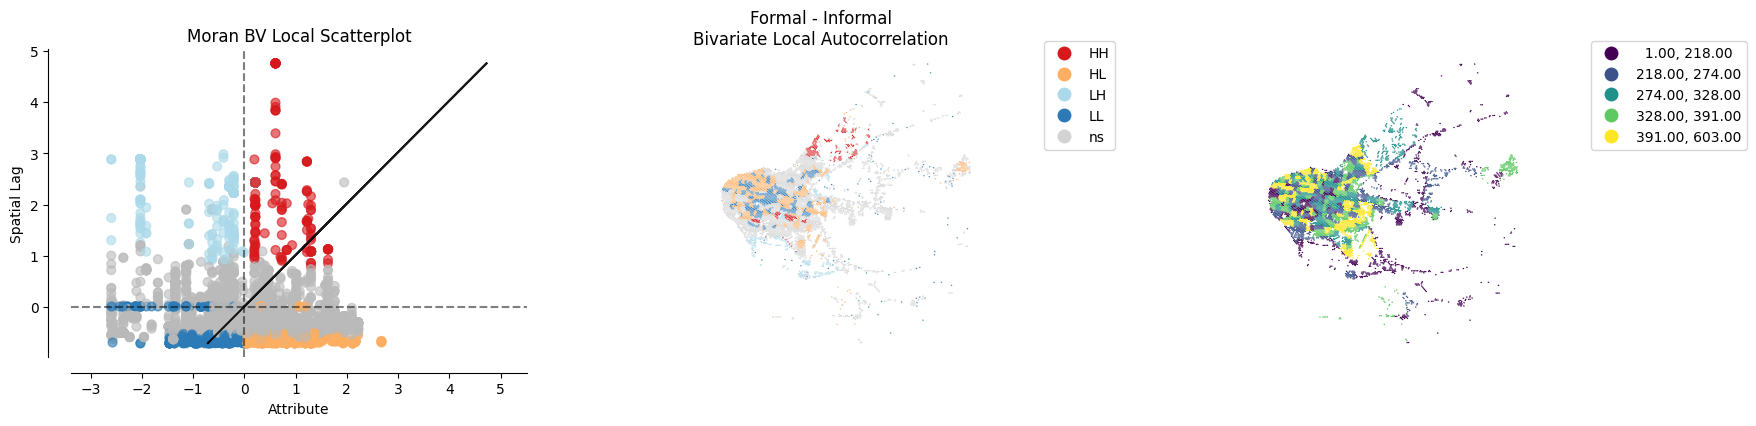

In [24]:
plot_local_autocorrelation_bv(
    tipo_vivienda_2010_h3, "informal", "formal", figsize=(20, 4)
)
plot_local_autocorrelation_bv(
    tipo_vivienda_2010_h3, "formal", "informal", figsize=(20, 4)
)

## 2020

('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 313, ' is an island (no neighbors)')
('WARNING: ', 776, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 3064, ' is an island (no neighbors)')
('WARNING: ', 3086, ' is an island (no neighbors)')
('WARNING: ', 3088, ' is an island (no neighbors)')
('WARNING: ', 3155, ' is an island (no neighbors)')
('WARNING: ', 3193, ' is an island (no neighbors)')
('WARNING: ', 3227, ' is an island (no neighbors)')
('WARNING: ', 3241, ' is an island (no neighbors)')
('WARNING: ', 3265, ' is an island (no neighbors)')
('WARNING: ', 3286, ' is an island (no neighbors)')
('WARNING: ', 3316, ' is an island (no neighbors)')
('WARNING: ', 3317, ' is an island (no neighbors)')
('WARNING: ', 3326, ' is an island (no neighbors)')
('WARNING: ', 3361, ' is an island (no neighbors)')
('WARNING: ', 3371, ' is an island (no neighbors)')
('WARNING: ', 3617, ' is an island (no neighbors)')
('WARNING: ', 3

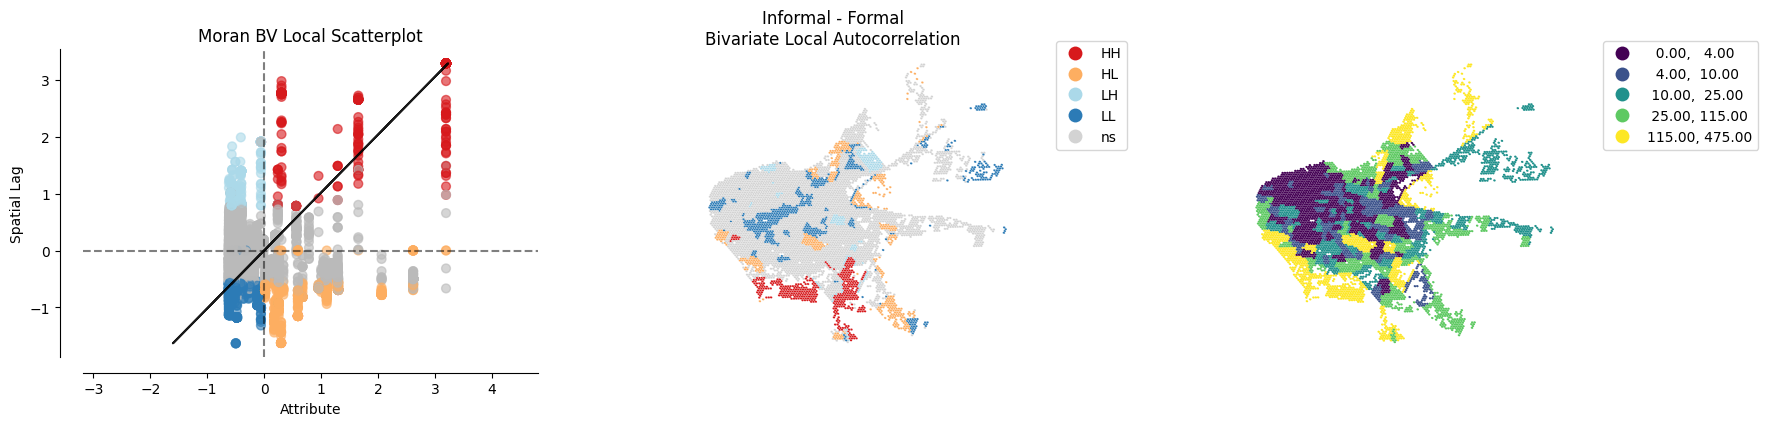

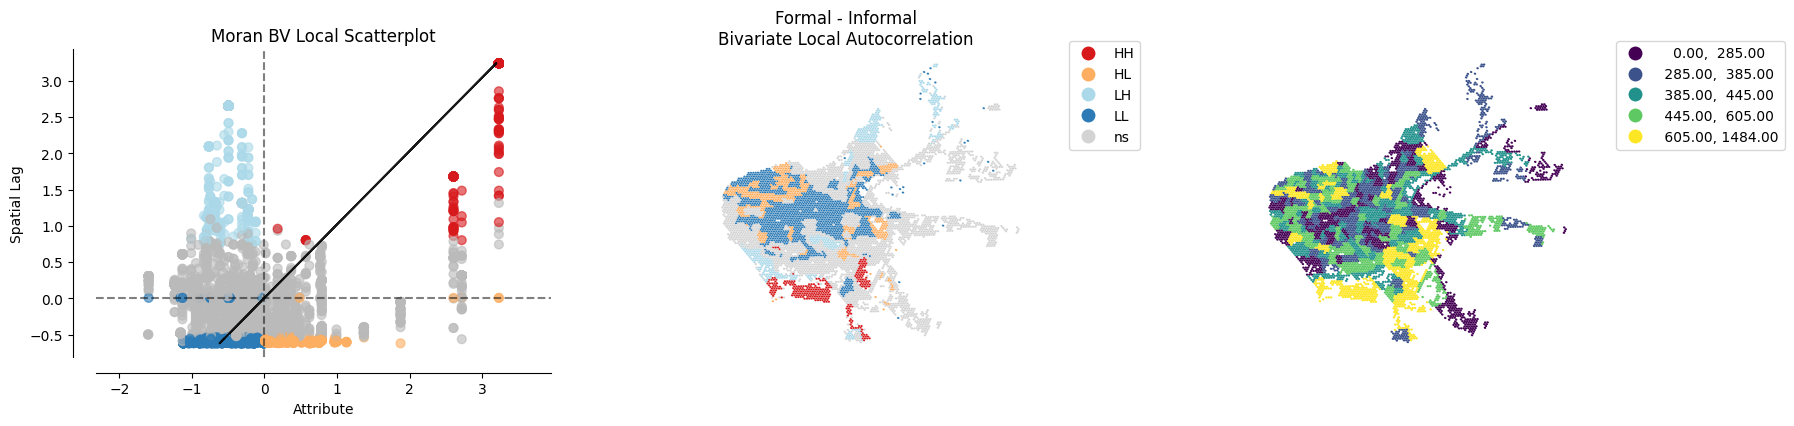

In [25]:
plot_local_autocorrelation_bv(
    tipo_vivienda_2020_h3, "informal", "formal", figsize=(20, 4)
)
plot_local_autocorrelation_bv(
    tipo_vivienda_2020_h3, "formal", "informal", figsize=(20, 4)
)